<a href="https://colab.research.google.com/github/Zilonar/ThinkStats2/blob/master/DSC_530_3_2_Exercise_Preparing_for_Exploratory_Data_Analysis_Using_Python_Michael_Ferrell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**My commentary should be removed if you are adopting this template for your weekly assignment submission.**

-- Replace the following bullets with your information --

*   Assignment Name
*   Student Name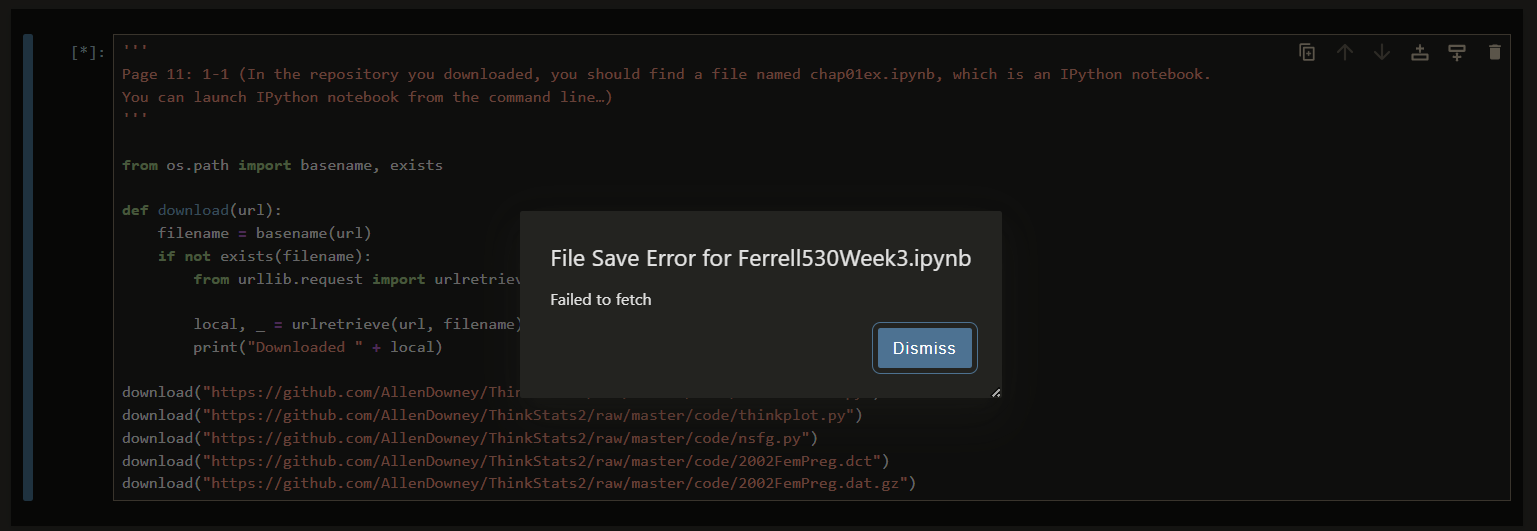

**Make sure you use the eBook to see the all the questions in each problem. Students very often lost completion points because they did not address all parts of the exercises**

For example, in Blackboard you only see:

*Complete the following exercises:*
* Page 11: 1-1 (In the repository you downloaded, you should find a file named chap01ex.ipynb, which is an IPython notebook. You can launch IPython notebook from the command line…)

*Go to Course Materials in Blackboard to access your ebook, for the first problem in Chapter 1, it should looks like this*


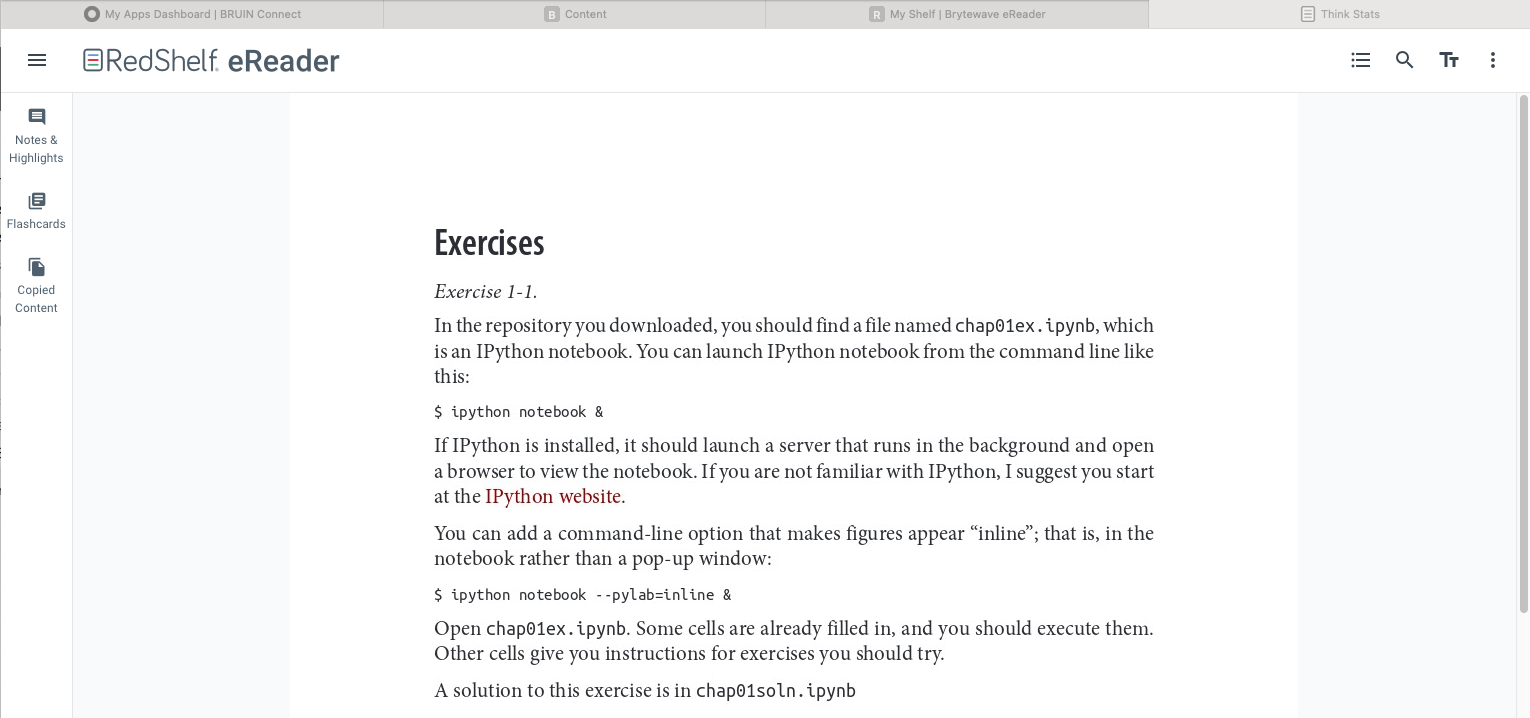

use #comment or markdown text cell to clearly label each exercise and it will section off as header if you use markdown mechanisms.

# Exercise 1-1

In [ ]:
# You might have to import some packages if for some reason your Anaconda setup missed it
# or it didn't import to for a shorten name like numpy as np
import numpy as np

The following code chunks is provided to download the data files and the Thinkstat packages from the textbook. You should either import the scripts via online download or from on your machine (using the os package).

In [ ]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

Downloaded thinkstats2.py
Downloaded thinkplot.py
Downloaded nsfg.py
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


**The py script and dataset can change in other chapters. Thus, always refer to the author's COLAB examples when you are completing your weekly reading of the textbook materials.**


The COLAB notebooks are listed in this section of [Downey's Github](https://github.com/AllenDowney/ThinkStats2?tab=readme-ov-file#working-with-the-code)


## (CONT) Exercise 1-1

For this exercise, the author meant to show you how to use command line interface to call up a ipython notebook. So it reads as $ ipython notebook. Depenidng on your machine, Command Prompt in Window or Terminal in Mac, it is how you would call an ipynb file. My screenshots is how it looks like in the Window OS Command Prompt.

***You don't have to show this in your assignment.***

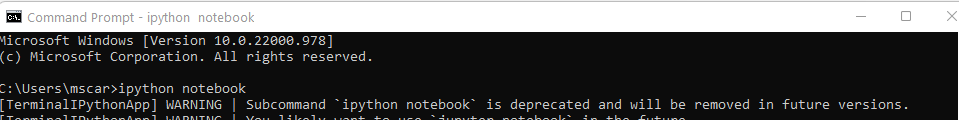

The Jupyter page will open if the command is understood by the computer. 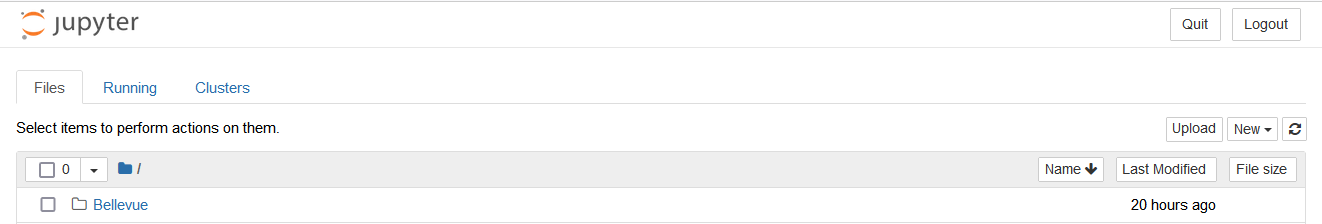

If you tried the second line in your Command Prompt on Window, you might be warned about change the command as 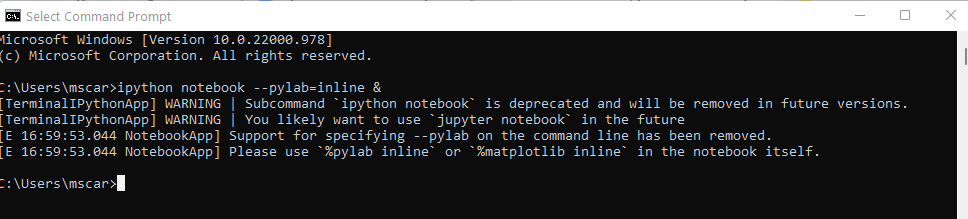

**So for Exercise 1-1, you don't have to show how you interacted with the Command Line interface. You simply have to show that you can import the list of needed scripts and dataset and can succesfully run the few lines of code for this part of the exercise.**

\-- I am not sure what I am doing worng. I have made several attempts and continue to get this error.--

## Exercise 1-2


**The script that the author provided in .py format can be confusing if you have not import/run a python script within a python IDE environment explicitly. You can read more about [import](https://docs.python.org/3/reference/import.html) or [future statement](https://docs.python.org/3/reference/simple_stmts.html#future) if you are interested, but those are advanced programming methods that is not the focus of this course.**

Technically, the author has created all the functions and script already. IGNORE:create a file named chap01ex.py

Simply start with the next part of the exercise where it said:

*   The variable pregnum is a recode that indicates how many times each respondent has been pregnant. Print the value counts for this variable and compare them to the published results in the NSFG codebook.
*   There are more to this exerise in which it asks for "cross-validateing" the number of records. It is up to you how you did it, and make sure you explain what you tried and what you found. Document, Document, and Document your work!

In [ ]:
"""This file contains code for use with "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2010 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html

Michael Ferrell updates
- Begining with a copy of code from nsfg.py
- import pandas
- removed     assert(len(resp) == 7643)    &    assert(resp.pregnum.value_counts()[1] == 1267)
- addded print statement for value counts
"""

import sys
import numpy as np
import thinkstats2
import pandas as pd    # Added pandas

from collections import defaultdict


def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    """Reads the NSFG respondent data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    CleanFemResp(df)
    return df


def CleanFemResp(df):
    """Recodes variables from the respondent frame.

    df: DataFrame
    """
    pass


def ReadFemPreg(dct_file='2002FemPreg.dct',
                dat_file='2002FemPreg.dat.gz'):
    """Reads the NSFG pregnancy data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    CleanFemPreg(df)
    return df


def CleanFemPreg(df):
    """Recodes variables from the pregnancy frame.

    df: DataFrame
    """
    # mother's age is encoded in centiyears; convert to years
    df.agepreg /= 100.0

    # birthwgt_lb contains at least one bogus value (51 lbs)
    # replace with NaN
    df.loc[df.birthwgt_lb > 20, 'birthwgt_lb'] = np.nan

    # replace 'not ascertained', 'refused', 'don't know' with NaN
    na_vals = [97, 98, 99]
    df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
    df.birthwgt_oz.replace(na_vals, np.nan, inplace=True)
    df.hpagelb.replace(na_vals, np.nan, inplace=True)

    df.babysex.replace([7, 9], np.nan, inplace=True)
    df.nbrnaliv.replace([9], np.nan, inplace=True)

    # birthweight is stored in two columns, lbs and oz.
    # convert to a single column in lb
    # NOTE: creating a new column requires dictionary syntax,
    # not attribute assignment (like df.totalwgt_lb)
    df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0

    # due to a bug in ReadStataDct, the last variable gets clipped;
    # so for now set it to NaN
    df.cmintvw = np.nan


def ValidatePregnum(resp, preg):
    """Validate pregnum in the respondent file.

    resp: respondent DataFrame
    preg: pregnancy DataFrame
    """
    # make the map from caseid to list of pregnancy indices
    preg_map = MakePregMap(preg)

    # iterate through the respondent pregnum series
    for index, pregnum in resp.pregnum.items():
        caseid = resp.caseid[index]
        indices = preg_map[caseid]

        # check that pregnum from the respondent file equals
        # the number of records in the pregnancy file
        if len(indices) != pregnum:
            print(caseid, len(indices), pregnum)
            return False

    return True


def MakePregMap(df):
    """Make a map from caseid to list of preg indices.

    df: DataFrame

    returns: dict that maps from caseid to list of indices into `preg`
    """
    d = defaultdict(list)
    for index, caseid in df.caseid.items():
        d[caseid].append(index)
    return d


def main():
    """Tests the functions in this module.

    script: string script name
    """
    # read and validate the respondent file
    resp = ReadFemResp()

    # Print the value counts for the pregnum variable
    print("Value counts for pregnum variable:")
    print(resp.pregnum.value_counts().sort_index())

    # read and validate the pregnancy file
    preg = ReadFemPreg()
    print(preg.shape)

    assert len(preg) == 13593
    assert preg.caseid[13592] == 12571
    assert preg.pregordr.value_counts()[1] == 5033
    assert preg.nbrnaliv.value_counts()[1] == 8981
    assert preg.babysex.value_counts()[1] == 4641
    assert preg.birthwgt_lb.value_counts()[7] == 3049
    assert preg.birthwgt_oz.value_counts()[0] == 1037
    assert preg.prglngth.value_counts()[39] == 4744
    assert preg.outcome.value_counts()[1] == 9148
    assert preg.birthord.value_counts()[1] == 4413
    assert preg.agepreg.value_counts()[22.75] == 100
    assert preg.totalwgt_lb.value_counts()[7.5] == 302

    weights = preg.finalwgt.value_counts()
    key = max(weights.keys())
    assert preg.finalwgt.value_counts()[key] == 6

    # validate that the pregnum column in `resp` matches the number
    # of entries in `preg`
    assert(ValidatePregnum(resp, preg))


    print('All tests passed.')


if __name__ == '__main__':
    main()

**You see how I have had both chapters in 1 notebook! It is possible to do that when you build your code cell in addressing each exercise. You have to submit 1 file for each weekly assignment, otherwise, assignment compliance points will be reduced.**



---



**Chapter 2 is straight forward because you have already gone through the process to get the data files and script loaded into your notebook from the previous steps. YOU WILL CONTINUE TO BUILD YOUR WORK IN THE SAME NOTEBOOK.**

## Exercise 2-1

Page 25, Exercise 2-1. Based on the results in this chapter, suppose you were asked to summarize what you learned about whether first babies arrive late.
* Which summary statistics would you use if you wanted to get a story on the
evening news?
* Which ones would you use if you wanted to reassure an anxious patient?

Finally, imagine that you are Cecil Adams, author of The Straight Dope (http://straightdope.com), and your job is to answer the question, “Do first babies arrive late?”
* Write a paragraph that uses the results in this chapter to answer the question clearly, precisely, and honestly.

In [ ]:
'''
1. Which summary statistics would you use if you wanted to get a story on the evening news?

  I would focus on using statistical measures that the public is more likely to be familiar with, such as mean, median, and standard deviation.
  I would also use terms and phrases that may be more familiar such as average and variability of the data as opposed to the statistical terms.
  This scenario is more about knowing the audience and presentation than about the statistical methods themselves.
'''

'''
2. Which ones would you use if you wanted to reassure an anxious patient?

  Again, I want to make sure they are comfortable with the conversation and are able to understand what is being conveyed.
  I would likely gauge the knowledge of the patient and look for queues that indicate their level of understanding.
  Depending on how this goes I would either launch into a discussion focused on the statistical methods I used and how they inform on the situation,
  spending time teaching as needed. If this seemed frustrating or like an inefficient use of time, I would try to describe it more plainly.
  I would not be incredibly technical either way due to their anxious state.

  I would focus on a range of statistics and use the median and mode to highlight expected outcomes.
'''

'''
3. Write a paragraph that uses the results in this chapter to answer the question clearly, precisely, and honestly.

	Based on the National Survey of Family Growth (NSFG) data, first-born babies show a higher variance in gestational age, meaning they are more
  likely to be born both prematurely (weeks 30-36) and post-term (weeks 41-44). The histogram for first-borns demonstrates a wider spread, and
  the standard deviation confirms this greater variability. While the average gestational age is similar for first-borns and later-borns, the
  distribution for first-borns has fatter tails, indicating more frequent early and late births. This statistically significant pattern highlights
  the increased risks associated with the timing of first-born deliveries.
'''

## Exercise 2-4

Page 25, Exercise 2-4. Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen's d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [ ]:
'''
Michael Ferrell
DSC530-T301 Data Exploration and Analysis (2247-1)
3.2 Exercise: Preparing for Exploratory Data Analysis Using Python
'''

import pandas as pd
import numpy as np

# Load the pregnancy data
preg = ReadFemPreg()

# Separate first babies and others
first_babies = preg[preg['birthord'] == 1]
other_babies = preg[preg['birthord'] != 1]

# Calculate means and standard deviations of birth weights
mean_first = first_babies['totalwgt_lb'].mean()
std_first = first_babies['totalwgt_lb'].std()
mean_other = other_babies['totalwgt_lb'].mean()
std_other = other_babies['totalwgt_lb'].std()

# Compute Cohen's d for birth weights
n1 = len(first_babies)
n2 = len(other_babies)
pooled_std = np.sqrt(((n1 - 1) * std_first**2 + (n2 - 1) * std_other**2) / (n1 + n2 - 2))
cohen_d_birth_weight = (mean_first - mean_other) / pooled_std

# Calculate means and standard deviations of pregnancy lengths
mean_length_first = first_babies['prglngth'].mean()
std_length_first = first_babies['prglngth'].std()
mean_length_other = other_babies['prglngth'].mean()
std_length_other = other_babies['prglngth'].std()

# Compute Cohen's d for pregnancy lengths
pooled_std_length = np.sqrt(((n1 - 1) * std_length_first**2 + (n2 - 1) * std_length_other**2) / (n1 + n2 - 2))
cohen_d_length = (mean_length_first - mean_length_other) / pooled_std_length

# Print the results
print(f"Mean birth weight of first babies: {mean_first:.2f} lb")
print(f"Mean birth weight of other babies: {mean_other:.2f} lb")
print(f"Cohen's d for birth weight: {cohen_d_birth_weight:.2f}")
print(f"Mean pregnancy length of first babies: {mean_length_first:.2f} weeks")
print(f"Mean pregnancy length of other babies: {mean_length_other:.2f} weeks")
print(f"Cohen's d for pregnancy length: {cohen_d_length:.2f}")


**A final note and remember to delete my commentaries. You will have to create a new notebook each week, re-import the necessary scripts and data files as a first step before you worked on the exercises!** 😀